### Домашнее задание №3

ДНЕПРОВ ДАНИЛА (2 вариант)

n — номер наблюдения,
id — идентификатор ролика,

framerate — число кадров в секунду,
frames — общее число кадров в видео,
bitrate — битрейт, Кбит/сек.
duration — продолжительность, сек.
size — размер видеофайла, байт.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

Возьмем данные и построим две корреляционные таблицы (Спирмена https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient и Пирсона https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In [42]:
data = pd.read_csv('youtube_2.csv')

In [43]:
data.drop(columns=['id', 'N'], inplace=True)

In [55]:
data.corr(method='pearson')

,framerate,frames,bitrate,duration,size
framerate,1.000000,0.244193,0.460516,0.101212,0.311067
frames,0.244193,1.000000,-0.036027,0.974489,0.790610
bitrate,0.460516,-0.036027,1.000000,-0.095275,0.410732
duration,0.101212,0.974489,-0.095275,1.000000,0.749226
size,0.311067,0.790610,0.410732,0.749226,1.000000


In [56]:
data.corr(method='spearman')

,framerate,frames,bitrate,duration,size
framerate,1.000000,0.350187,0.646973,0.004589,0.532503
frames,0.350187,1.000000,0.218638,0.914743,0.691965
bitrate,0.646973,0.218638,1.000000,-0.051917,0.807417
duration,0.004589,0.914743,-0.051917,1.000000,0.502262
size,0.532503,0.691965,0.807417,0.502262,1.000000


In [50]:
data.corr(method='pearson').to_csv('corrPearson.csv') # выгружаем в таблцы
data.corr(method='spearman').to_csv('corrSpearman.csv')

Далее оценим значимость каждого коэффициента:
    * — коэффициент значим на уровне 5%,
    ** — коэффициент значим на уровне 1%,
    *** — коэффициент значим на уровне 0.1%.


$$t = \frac{r * \sqrt{(n-2)}}{\sqrt{(1 - r^2)}}$$

In [51]:
corrPearson = pd.read_csv('corrPearson.csv')
corrSpearman = pd.read_csv('corrSpearman.csv')

In [52]:
corrArray = np.empty([data.shape[1], data.shape[1]], dtype='object')
i, j = 0, 0
for name in data.columns:
    for name2 in data.columns:
        corrArray[i][j] = str(np.round(data.corr(method='pearson')[name][name2], decimals=3))
        if(name != name2):
            t = np.abs(float(corrArray[i][j]) * np.sqrt(data.shape[0] - 2) / np.sqrt(1 - float(corrArray[i][j])**2))
            t5 = stats.t.ppf(0.975, data.shape[0] - 2)
            t1 = stats.t.ppf(0.995, data.shape[0] - 2)
            t01 = stats.t.ppf(0.9995, data.shape[0] - 2)
            if(t > t01):
                    corrArray[i][j] = '***' + corrArray[i][j] 
            elif(t > t1):
                 corrArray[i][j] = '**' + corrArray[i][j]
            elif(t > t5):
                 corrArray[i][j] = '*' + corrArray[i][j]
        j += 1
    i += 1
    j = 0
corrPearson = pd.DataFrame(data=corrArray, index=data.columns, columns=data.columns)
corrPearson.head()

,framerate,frames,bitrate,duration,size
framerate,1.0,*0.244,***0.461,0.101,**0.311
frames,*0.244,1.0,-0.036,***0.974,***0.791
bitrate,***0.461,-0.036,1.0,-0.095,***0.411
duration,0.101,***0.974,-0.095,1.0,***0.749
size,**0.311,***0.791,***0.411,***0.749,1.0


In [60]:
corrArray = np.empty([data.shape[1], data.shape[1]], dtype='object')
i, j = 0, 0
for name in data.columns:
    for name2 in data.columns:
        corrArray[i][j] = str(np.round(data.corr(method='spearman')[name][name2], decimals=3))
        if(name != name2):
            t = np.abs(float(corrArray[i][j]) * np.sqrt(data.shape[0] - 2) / np.sqrt(1 - float(corrArray[i][j])**2))
            t5 = stats.t.ppf(0.975, data.shape[0] - 2)
            t1 = stats.t.ppf(0.995, data.shape[0] - 2)
            t01 = stats.t.ppf(0.9995, data.shape[0] - 2)
            if(t > t01):
                corrArray[i][j] = '***' + corrArray[i][j] 
            elif(t > t1):
                 corrArray[i][j] = '**' + corrArray[i][j]
            elif(t > t5):
                 corrArray[i][j] = '*' + corrArray[i][j]
        j += 1
    i += 1
    j = 0
corrSpearman = pd.DataFrame(data=corrArray, index=data.columns, columns=data.columns)
corrSpearman.head()

,framerate,frames,bitrate,duration,size
framerate,1.0,***0.35,***0.647,0.005,***0.533
frames,***0.35,1.0,*0.219,***0.915,***0.692
bitrate,***0.647,*0.219,1.0,-0.052,***0.807
duration,0.005,***0.915,-0.052,1.0,***0.502
size,***0.533,***0.692,***0.807,***0.502,1.0


Самая большая разница коэффициентов у признаков bitrate и size. Построим диграмму рассеивания

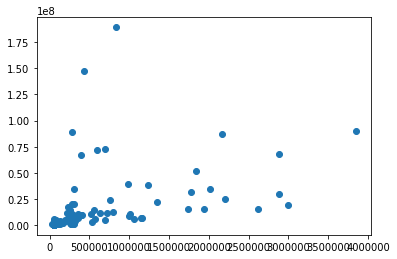

In [62]:
x = data['bitrate']
y = data['size']

plt.scatter(x, y)
plt.show()